In [42]:
from sklearn.datasets import fetch_openml

import numpy as np

In [43]:
mnist = fetch_openml("mnist_784",version=1)


In [44]:
X= np.array(mnist.data)
y= np.array(mnist.target, dtype = int)


In [45]:
X = X/255.0 # normlizing the pixel values 

In [46]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 10, random_state = 42,n_init = 10)
kmeans.fit(X)

KMeans(n_clusters=10, n_init=10, random_state=42)

In [47]:
import matplotlib.pyplot as plt 

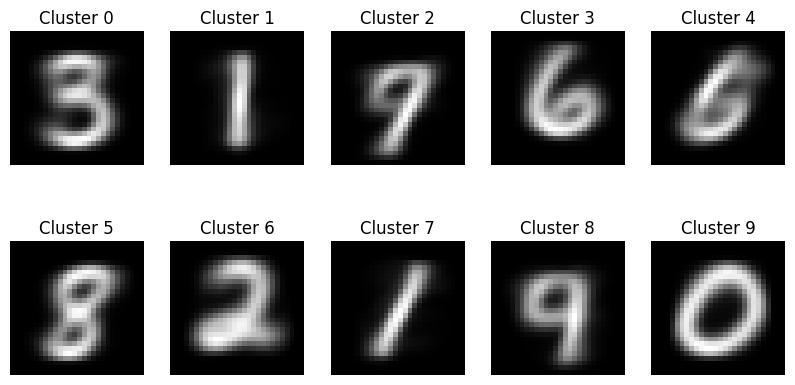

In [48]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(kmeans.cluster_centers_[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Cluster {i}")
    ax.axis('off')

plt.show()

In [49]:
import pandas as pd 
clusters, counts = np.unique(kmeans.labels_, return_counts=True)
df = pd.DataFrame({'Cluster': clusters, 'Count': counts})
print(df)

   Cluster  Count
0        0   8674
1        1   6658
2        2   9974
3        3   4977
4        4   6483
5        5   6771
6        6   5313
7        7   5322
8        8  10446
9        9   5382


In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [51]:
from scipy.stats import mode
cluster_map={}

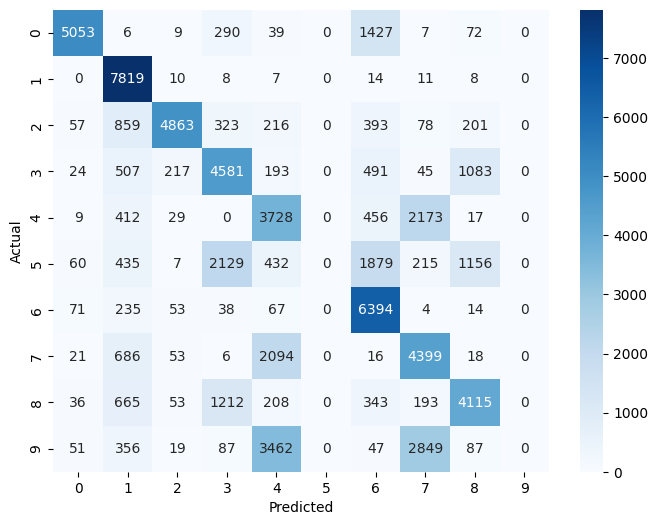

In [53]:
# Assign each cluster to the most common actual digit
from scipy.stats import mode
cluster_map = {}
for i in range(10):
    mask = (kmeans.labels_ == i)
    common_digit = mode(y[mask], keepdims=True).mode[0]
    cluster_map[i] = common_digit

# Replace cluster labels with actual digits
predicted_labels = np.array([cluster_map[label] for label in kmeans.labels_])

# Confusion matrix
cm = confusion_matrix(y, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [55]:
#Using PCA

from sklearn.decomposition import PCA

# Reduce to 50 dimensions for faster clustering
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

# Apply K-Means again
kmeans_pca = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans_pca.fit(X_pca)


KMeans(n_clusters=10, n_init=10, random_state=42)